# Решения задач курса CSC ["Математическая статистика"](https://stepik.org/course/326)

In [2]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy.stats import norm, chi2, t, f, kstest, jarque_bera, anderson, shapiro, probplot, kendalltau, pearsonr


## 1. Выборка. Описательная статистика
### 1.4. Описательная статистика
#### 1.4.12

In [4]:
data = [23, 24, 21, 23, 22, 21, 20, 21, 28, 25, 22, 22, 25, 21]

data.sort()
n = len(data)
D = 0

X_mean = sum(data) / n
med = (data[n // 2] + data[(n + 1) // 2]) / 2
Q_1 = data[int((n * 0.25) // 1)]
Q_3 = data[int((n * 0.75) // 1)]

for i in range(0, n):
    D = (data[i] - X_mean) ** 2 / n

print('{:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}'. format(X_mean, D, med, Q_1, Q_3))


22.71, 2.00, 22.00, 21.00, 24.00


### 1.5. Задание на тему описательной статистики
#### Задача "13-е число"

    Правда ли, что пятница 13е неудачный день?

    Воспользуйтесь данными из файла  13_6  и попробуйте ответить на вопросы, исходя из данных по числу покупателей по пятницам 6-го и 13-го. Проведите описательный анализ.

    Формат файла:
        - тип данных
        - год и месяц
        - число покупателей в пятницу 6-го
        - число покупателей в пятницу 13-го
        - супермаркет

#### 1.5.4

In [5]:
df = pd.read_csv('13_6.csv', header=None, delimiter="\t")
df.columns = ['action', 'month', '6-th', '13-th', 'city']
df.head()


,action,month,6-th,13-th,city
0,shopping,"1990, July",4942,4882,Epsom
1,shopping,"1991, September",4895,4736,Epsom
2,shopping,"1991, December",4805,4784,Epsom
3,shopping,"1992, March",4570,4603,Epsom
4,shopping,"1992, November",4506,4629,Epsom


In [6]:
df = df.sort_values(by=['13-th']).reset_index(drop=True)
n = df.shape[0]
D = 0

X_mean = sum(df['13-th'])/n

if n % 2 == 1:
    med = df['13-th'][(n // 2)]
else:
    med = (df['13-th'][(n // 2)] + df['13-th'][(n // 2 + 1)]) / 2
    
D = np.sum((df['13-th'] - df['13-th'].mean())**2) / n            # смещенная оценка дисперсии

print('{:.1f}, {:.1f}, {:.1f}'.format(X_mean, med, D))


5017.0, 4736.0, 1345096.1


#### 1.5.5

In [7]:
D = 0
mu_3 = 0
mu_4 = 0

df['differ'] = df['13-th'] - df['6-th']
X_mean = sum(df['differ'])/n
D = np.sum((df['differ'] - X_mean) ** 2 / n)
mu_3 = np.sum((df['differ'] - X_mean) ** 3 / n)
mu_4 = np.sum((df['differ'] - X_mean) ** 4 / n)
s = math.sqrt(D)
S_k1 = mu_3 / (s ** 3)
K = mu_4 / (s ** 4) - 3

print('Выборочная дисперсия колонки {}: {:.4f}'.format('differ',df['differ'].var()))
print('{:.2f}, {:.2f}, {:.2f}'. format(X_mean, K, S_k1))


Выборочная дисперсия колонки differ: 30618.5283
46.49, 4.96, 1.47


#### 1.5.6

In [8]:
print('Медиана {}: {:.2f}'.format('differ', df['differ'].median()))
df.describe()


Медиана differ: 11.00


,6-th,13-th,differ
count,45.000000,45.000000,45.000000
mean,4970.511111,5017.000000,46.488889
std,1165.615456,1172.888083,174.981508
min,3558.000000,3554.000000,-302.000000
25%,3954.000000,3926.000000,-47.000000
50%,4805.000000,4736.000000,11.000000
75%,6026.000000,6162.000000,136.000000
max,7138.000000,7057.000000,774.000000


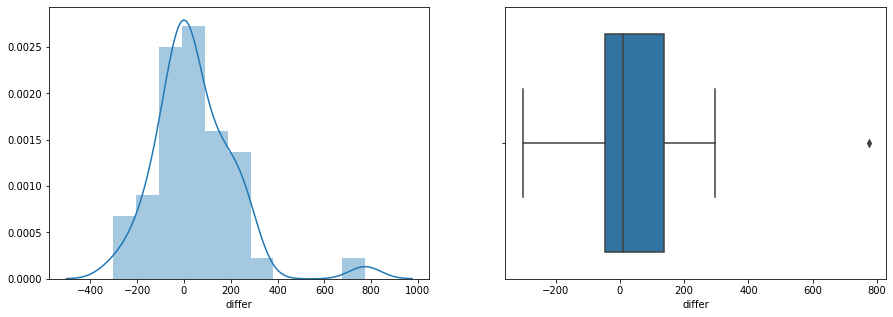

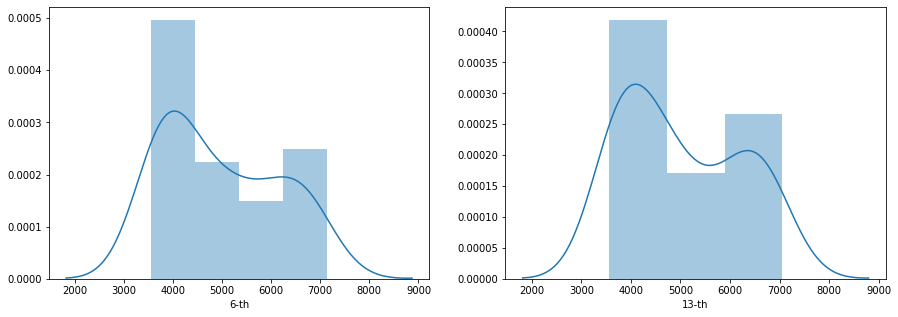

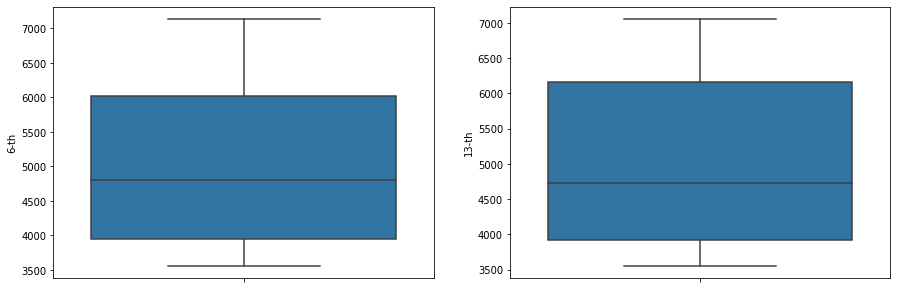

In [9]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
sns.distplot(df['differ'], hist=True)
plt.subplot(1,2,2)
sns.boxplot(df['differ'])

plt.show()


plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
sns.distplot(df['6-th'], hist=True)
plt.subplot(1,2,2)
sns.distplot(df['13-th'], hist=True)

plt.show()


plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
sns.boxplot(df['6-th'], orient='v')
plt.subplot(1,2,2)
sns.boxplot(df['13-th'], orient='v')

plt.show()


#### Задача "Колледжи"

    - School - название школы
    - School_Type - тип школы (школа искусств  'Lib Arts', исследовательский университет 'Univ')
    - SAT - медиана объединенных значений Math и Verbal SAT  студентов
    - Acceptance - % принятых абитуриентов
    - $\$$ /Student  -  Деньги, расходуемые на одного студента в среднем
    - Top 10% -  % студентов в топ 10% выпускных классов
    - %PhD -  %  факультетов, имеющих PhD
    - Grad% - % студентов, которые успешно завершили обучение
    
#### 1.5.9

In [10]:
df = pd.read_csv('colleges.csv', header=0, delimiter="\t")
df.head()


,School,School_Type,SAT,Acceptance,$/Student,Top 10%,%PhD,Grad%
0,Amherst,Lib Arts,1315,22,26636,85,81,93
1,Swarthmore,Lib Arts,1310,24,27487,78,93,88
2,Williams,Lib Arts,1336,28,23772,86,90,93
3,Bowdoin,Lib Arts,1300,24,25703,78,95,90
4,Wellesley,Lib Arts,1250,49,27879,76,91,86


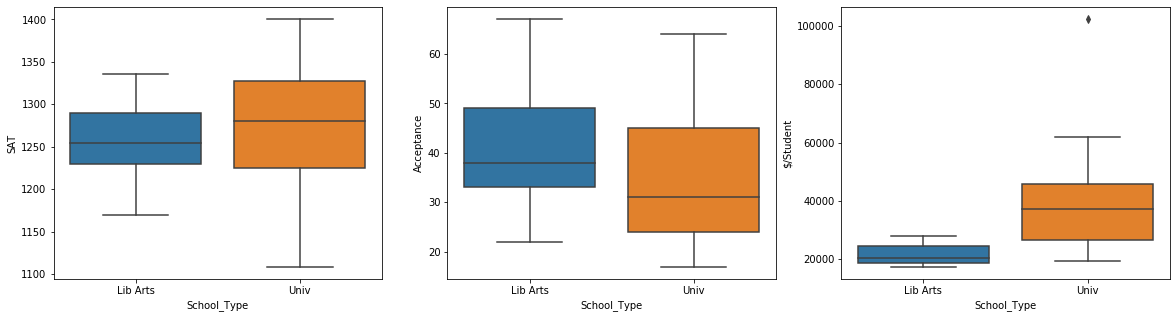

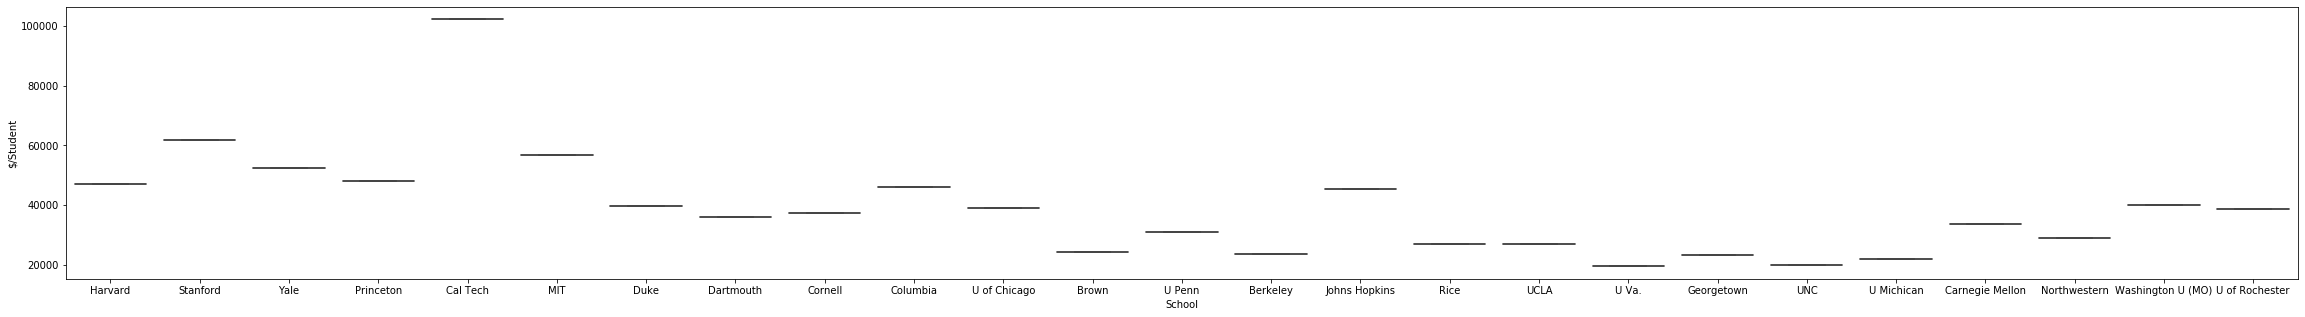

In [11]:
plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
sns.boxplot(df['School_Type'], df['SAT'], orient='v')
plt.subplot(1,3,2)
sns.boxplot(df['School_Type'], df['Acceptance'], orient='v')
plt.subplot(1,3,3)
sns.boxplot(df['School_Type'], df['$/Student'], orient='v')

plt.show()


plt.figure(figsize=(40, 5))

sns.boxplot(df.loc[df['School_Type'] == 'Univ']['School'], df['$/Student'])

plt.show()


#### 1.5.10

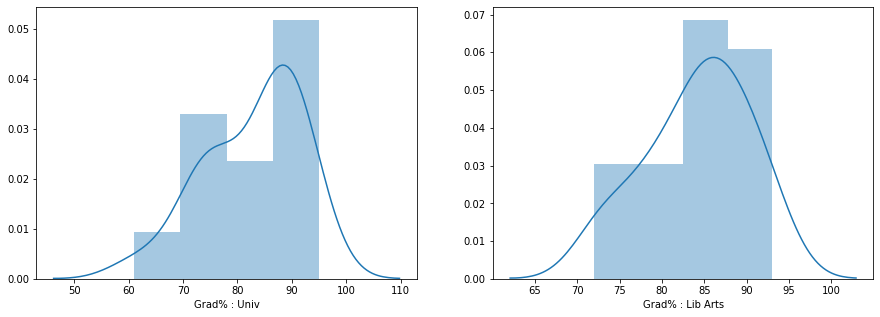

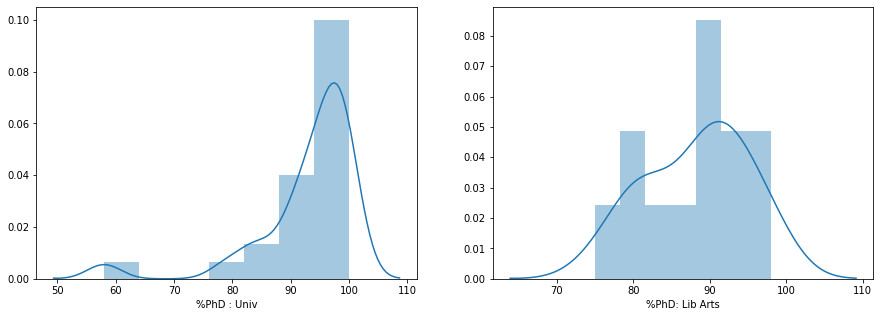

In [12]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
sns.distplot(df.loc[df['School_Type'] == 'Univ']['Grad%'], hist=True, axlabel = 'Grad% : Univ')
plt.subplot(1,2,2)
sns.distplot(df.loc[df['School_Type'] == 'Lib Arts']['Grad%'], hist=True, axlabel = 'Grad% : Lib Arts')

plt.show()


plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
sns.distplot(df.loc[df['School_Type'] == 'Univ']['%PhD'], bins = 7, hist=True, axlabel = '%PhD : Univ')
plt.subplot(1,2,2)
sns.distplot(df.loc[df['School_Type'] == 'Lib Arts']['%PhD'], bins = 7, hist=True, axlabel = '%PhD: Lib Arts')

plt.show()


#### 1.5.11

In [13]:
M = df.loc[df['School_Type'] == 'Lib Arts']['SAT'].mean()
Q3 = df.loc[df['School_Type'] == 'Univ']['Acceptance'].quantile(0.75)
df_U = df.loc[df['School_Type'] == 'Univ']
Max_money = df_U.sort_values(by=['$/Student'], ascending=False).reset_index(drop=True)['School'][0]

print('{:.2f}, {:.2f}, {}'.format(M, Q3, Max_money))


1256.64, 45.00, Cal Tech


## 2. Точечные оценки. Свойства и методы построения
### 2.1. Точечные оценки и их свойства
#### 2.1.3

In [14]:
with open('dataset_39625_3.txt') as file:
    data = list(map(float, file.read().split(', ')))
    
n = len(data)
X_mean = sum(data) / n

print(data)


[8.91, 13.84, 8.94, 13.28, 13.28, 15.63, 10.83, 14.73, 16.21, 11.6, 14.97, 14.02, 12.0, 11.95, 13.88, 15.67, 11.21, 13.82, 12.29, 15.12]


#### 2.1.6.

In [15]:
data = [
    17.4, 19.9, 19.9, 19.0, 20.7, 18.2, 18.6, 20.3, 21.7, 20.8, 16.7, 20.3, 22.5, 18.3, 21.1,
    16.3, 22.0, 19.5, 18.1, 21.1, 20.0, 21.6, 21.5, 21.1, 23.3, 23.0, 17.8, 19.5, 21.6, 22.9
]
n = len(data)
D = 0

X_mean = sum(data) / n

for i in range(0,len(data)):
    D += (data[i] - X_mean) ** 2 / len(data)

print ('%.3f' % D)


3.414


### 2.2. Методы построения точечных оценок

#### 2.2.10

In [16]:
data = [2, 1, 0, 0, 1]
n = len(data)
lmbd = 3

# Вариант 1

L = 1

for i in range(0, n):
    L = L * (lmbd ** data[i]) / math.factorial(data[i]) * math.exp(-lmbd)
    
print ('%0.3f' % math.log(L))


# Вариант 2

l = [0] * n

for i in range(0, n):
    l[i] = math.log(math.factorial(data[i]))

lnL = -lmbd * n + sum(data) * math.log(lmbd) - sum(l)

print ('%.3f' % lnL)


-11.299
-11.299


#### 2.2.16

In [17]:
print('Оценка праметра θ с помощью метода моментов (g(x)=x): {:0.2f}'.format(1 / 3))
print('Оценка праметра θ с помощью метода максимального правдоподобия: {:0.2f}'.format(1 / 3))
print('{:0.2f}, {:0.2f}'.format(1 / 3, 1 / 3))


Оценка праметра θ с помощью метода моментов (g(x)=x): 0.33
Оценка праметра θ с помощью метода максимального правдоподобия: 0.33
0.33, 0.33


### 2.3. Задание на тему построения точечных оценок
#### 2.3.4

In [18]:
with open('sample_2_4.txt') as file:
    data = file.read().splitlines()

powers = {
    'p': 0,
    '1-p': 0,
    'g': 0,
    '1-g': 0
}

for search in data:
    if search[2] == 'N':
        powers['g'] += 1
        powers['1-p'] += int(search[0])
        powers['1-g'] += int(search[0]) - 1
    else:
        powers['p'] += 1
        powers['1-p'] += int(search[0]) - 1
        powers['1-g'] += int(search[0]) - 1
        
print('Функция правдоподобия: L(p, q) = p^{} * (1-p)^{} * g^{} * (1-g)^{}'.format(powers['p'], powers['1-p'], powers['g'], powers['1-g']), '\n')
print('{:.3f}, {:.3f}'.format(78 / 175, 22 / 97))


Функция правдоподобия: L(p, q) = p^78 * (1-p)^97 * g^22 * (1-g)^75 

0.446, 0.227


#### 2.3.7

In [19]:
print('Оценка праметра θ с помощью метода моментов (g(x)=x): {:0.2f}'.format(2))
print('Оценка праметра θ с помощью метода максимального правдоподобия: {:.2f}'.format(-3/math.log(0.4 * 0.7 * 0.9)), '\n')
print('{:.2f}, {:.2f}'.format(2, -3 / math.log(0.4 * 0.7 * 0.9)))


Оценка праметра θ с помощью метода моментов (g(x)=x): 2.00
Оценка праметра θ с помощью метода максимального правдоподобия: 2.18 

2.00, 2.18


## 3. Доверительные интервалы. Стратифицированные выборки
### 3.1. Стратифицированные выборки
#### 3.1.5

In [20]:
W = [0.3, 0.6, 0.1]
E = [3, 2, 5]
D = [1, 4, 0.01]
mu = 0
var = 0

for k in range(0,3):
    mu += W[k] * E[k]
    
for k in range(0,3):
    var += W[k] * (D[k] + (E[k] - mu) ** 2)
    
print('{:.1f}, {:.1f}'.format(mu, var))

2.6, 3.5


#### 3.1.7

In [21]:
W = [0.4, 0.6]
data = [
    [282, 226, 188, 327, 344, 304, 414, 224, 335, 270],
    [417,  851,  742, 1217, 1160,  993,  864,  852, 1286,  988]
]

X_s = W[0] * np.mean(data[0]) + W[1] * np.mean(data[1])
D_s = W[0] * (np.var(data[0]) + (X_s - np.mean(data[0])) ** 2) + W[1] * (np.var(data[1]) + (X_s - np.mean(data[1])) ** 2)

print('{:.1f}, {:.1f}'.format(X_s, D_s))


678.8, 136721.7


### 3.2. Доверительные интервалы
#### 3.2.10

In [22]:
data = [
    -0.48, -0.2, -1.34, 0.11, 0.06, 0.44, 0.89, 1.47, 0.63, 0.11,
    0.34, 0.56, -0.51, 0.02, 1.63, -0.49, 0.06, 1.19, -0.94, -1.59
]
alpha = 0.05
n = len(data)
S2 = 0

for i in data:
    S2 += i ** 2

a = S2 / chi2.ppf(1 - alpha / 2, df = n)
b = S2 / chi2.ppf(alpha / 2, df = n)

print('{:.3f}, {:.3f}'.format(a, b))


0.411, 1.466


#### 3.2.16

In [23]:
def percent5(a, b):
    if (b - a) / 2 > 0.05:
        return 'G'
    else:
        return 'L'

with open('dataset_16004_16.txt') as file:
    data = file.read().split(', ')

alpha = 0.05
n = len(data)
m = 0

for i in data:
    if i == '1':
        m += 1

a = m / n - norm.ppf(0.975) * math.sqrt(m  * (1 - m / n)) / n
b = m / n + norm.ppf(0.975) * math.sqrt(m  * (1 - m / n)) / n

print('{:.4f}, {:.4f}, {}'.format(a, b, percent5(a, b)))


0.0293, 0.0667, L


### 3.3. Задание на тему стратификации и построение интервальной оценки
#### 3.3.8

In [24]:
n = 10000
m = 4000

a = m / n - norm.ppf(1 - alpha / 2) * math.sqrt(m  * (1 - m / n)) / n
b = m / n + norm.ppf(1 - alpha / 2) * math.sqrt(m  * (1 - m / n)) / n

print('{:.3f}, {:.3f}'.format(a, b))


0.390, 0.410


## 4. Статистические гипотезы. Параметрические критерии
### 4.1. Лемма Неймана-Пирсона
#### 4.2.7

In [25]:
alpha = 0.1 
n = 100
s2 = 1              # несмещенная оценка дисперсии
X_mean = 3.3        # средний стаж
a_0 = 3.5

Z_sample = (X_mean - a_0) / math.sqrt(s2 / n)        #выборочная статистика
t_alpha = t.ppf(alpha, n - 1)
p_value = t.cdf(Z_sample, n - 1)

print('Критическая область для статистики критерия Z: ({}, {:.2f})'.format(-math.inf, t_alpha))
print('p-value = {:.3f}'.format(p_value))

if p_value > alpha:
    print('Принимаем H_0')
else:
    print('Отклоняем H_0')


Критическая область для статистики критерия Z: (-inf, -1.29)
p-value = 0.024
Отклоняем H_0


#### 4.2.10

In [26]:
a_0 = 13.2
n = 40
X_mean = 14.4
sigma = 2.915
alpha = 0.01

s = sigma * math.sqrt(n / (n - 1))
Z_sample = (X_mean - a_0) / (s / math.sqrt(n))
u_alpha = t.ppf(1 - alpha, n - 1)

if Z_sample <= u_alpha:
    H = 'H0'
else:
    H = 'H1'

print('{:.2f}, {}'.format(Z_sample, H))


2.57, H1


#### 4.2.15

In [27]:
data = [986, 1005, 991, 994, 983, 1002, 996, 998,1002, 983]
alpha = 0.05
n = 10
X_mean = 994        # средний стаж
a_0 = 1000

s2 = np.var(data) * n / (n - 1)                          # несмещенная оценка дисперсии
Z_sample = (X_mean - a_0) / math.sqrt(s2 / n)       # выборочная статистика
p_value = 2 * t.cdf(Z_sample, n - 1)

if p_value > alpha:
    H = 'H0'
else:
    H = 'H1'

print('{:.3f}, {}'.format(p_value, H))


0.043, H1


### 4.3. Критерии о параметрах нормального и биномиального распределений
#### 4.3.3

In [28]:
alpha = 0.1
n = 20

chi2_alpha = chi2.ppf(alpha, n - 1)

print('{:.3f}'.format(chi2_alpha))


11.651


#### 4.3.6

In [29]:
alpha = 0.05
n = 25
s2 = 13.5           # несмещенная оценка дисперсии
X_mean = 100        # средний вес
sigma_0_2 = 9

Z_sample = (n-1) * s2 / sigma_0_2        # выборочная статистика
p_value = 1 - chi2.cdf(Z_sample, n - 1)

if p_value > alpha:
    H = 'H0'
else:
    H = 'H1'

print('{:0.3f}, {}'.format(p_value, H))


0.055, H0


#### 4.3.14.

In [30]:
alpha_0 = 0.01
p_0 = 0.5
n = 225
m = 135

Z_sample = m        # выборочная статистика
c_1 = n * p_0 + math.sqrt(n * p_0 * (1 - p_0)) * norm.ppf(1 - alpha_0)

if Z_sample > c_1:
    H = 'H1'
else:
    H = 'H0'

print('{:.3f}, {}, {}'.format(c_1, n, H))


129.948, 225, H1


### 4.4 Задача на проверку статистической гипотезы
#### 4.4.3

In [31]:
alpha_0 = 0.02
m = 60
p_0 = 0.25
n = 747
m = 60

Z_sample = m        # выборочная статистика
c_1 = n * p_0 + math.sqrt(n * p_0 * (1 - p_0)) * norm.ppf(alpha_0)

if Z_sample < c_1:
    H = 'H1'
else:
    H = 'H0'

print('{:.3f}, {:.3f}, {}'.format(0, c_1, H))


0.000, 162.444, H1


#### 4.4.4

In [32]:
data = [
    1380, 1344, 1356, 1291, 1308, 1271, 1371, 1430, 1381, 1457, 1492, 1240, 1256, 1466,
    1214, 1448, 1510, 1395, 1507, 1264, 1293, 1251, 1380, 1386, 1411, 1434, 1302, 1529,
    1352, 1494, 1348, 1464, 1286, 1345, 1491, 1259, 1541, 1214, 1310, 1286
]
alpha = 0.03
a_0 = 1222
n = len(data)

X_mean = np.mean(data)                             # выборочное среднее
s2 = np.var(data) * n / (n-1)                      # несмещенная оценка дисперсии
Z_sample = (X_mean - a_0) / math.sqrt(s2/n)        # выборочная статистика

print('{:.3f}'.format(Z_sample))


9.855


#### 4.4.6

In [33]:
data = [
    1380, 1344, 1356, 1291, 1308, 1271, 1371, 1430, 1381, 1457, 1492, 1240, 1256, 1466,
    1214, 1448, 1510, 1395, 1507, 1264, 1293, 1251, 1380, 1386, 1411, 1434, 1302, 1529,
    1352, 1494, 1348, 1464, 1286, 1345, 1491, 1259, 1541, 1214, 1310, 1286
]
alpha = 0.03
a_0 = 1222
n = len(data)

X_mean = np.mean(data)                             # выборочное среднее
s2 = np.var(data) * n / (n-1)                      # несмещенная оценка дисперсии
Z_sample = (X_mean - a_0) / math.sqrt(s2/n)        # выборочная статистика

p_value = 1 - t.cdf(Z_sample, n - 1)

if p_value > alpha:
    H = 'H0'
else:
    H = 'H1'

print('{:.2f}, {}'.format(p_value, H))


0.00, H1


## 5. Критерии однородности
### 5.1. Параметрические критерии однородности
#### 5.1.5

In [34]:
m = 9
n = 11
sigma2_1 = 5.9
sigma2_2 = 23.3
alpha = 0.6

s2_1 = sigma2_1 * m / (m - 1)
s2_2 = sigma2_2 * n / (n - 1)

print('{:.3f}'.format(f.ppf(alpha, m - 1, n - 1)))


1.170


#### 5.1.6

In [35]:
m = 9
n = 11
sigma2_1 = 5.9
sigma2_2 = 23.3
alpha = 0.01

s2_1 = sigma2_1 * m / (m - 1)
s2_2 = sigma2_2 * n / (n - 1)

Z_sample = s2_1 / s2_2
f_alpha_2 = f.ppf(alpha / 2, m - 1, n - 1)
f_1_alpha_2 = f.ppf(1 - alpha / 2, m - 1, n - 1)

if (Z_sample < f_alpha_2) | (Z_sample > f_1_alpha_2):
    H = 'H1'
else:
    H = 'H0'

print('{:.3f}, {}'.format(Z_sample, H))


0.259, H0


#### 5.1.9

In [36]:
m = 16
n = 9
D1 = 0.91
D2 = 1.51
alpha = 0.3

s2_1 = D1 * m / (m - 1)        # несмещенная оценка дисперсии x_1
s2_2 = D2 * n / (n - 1)        # несмещенная оценка дисперсии x_2
K = (s2_1 / m + s2_2 / n) ** 2 / ((s2_1 / m ) ** 2 / (m - 1) + (s2_2 / n ) ** 2 / (n - 1)) // 1

print('{:.3f}'.format(t.ppf(alpha, K)))


-0.538


#### 5.1.11

In [37]:
m = 16
n = 9
D1 = 0.91
D2 = 1.51
X1_mean = 12.57
X2_mean = 11.87
alpha = 0.02

s2_1 = D1 * m / (m - 1)        # несмещенная оценка дисперсии x_1
s2_2 = D2 * n / (n - 1)        # несмещенная оценка дисперсии x_2
K = (s2_1 / m + s2_2 / n) ** 2 / ((s2_1 / m ) ** 2 / (m - 1) + (s2_2 / n ) ** 2 / (n - 1)) // 1
Z_sample = (X1_mean - X2_mean) / math.sqrt(s2_1 / m + s2_2 / n)
p_value = 2 * min(t.cdf(Z_sample, K), 1 - t.cdf(Z_sample, K))

if p_value > alpha:
    H = 'H0'
else:
    H = 'H1'

print('{:.3f}, {}'.format(p_value, H))


0.184, H0


#### 5.1.13

In [38]:
n = 28
alpha = 0.9

print('%.3f' % t.ppf(alpha, n - 1))

1.314


#### 5.1.14

In [39]:
import pandas as pd
from scipy.stats import t
import math

data = pd.read_csv('cholesterol.txt', header=0, sep='\t')
n = data.shape[0]
alpha = 0.05

data['Q'] = data['Day2'] - data['Day4']
Z_sample = data['Q'].mean() / data['Q'].std() * math.sqrt(n)
p_value = 2 * min(t.cdf(Z_sample, n - 1), 1 - t.cdf(Z_sample, n - 1))

if p_value > alpha:
    H = 'H0'
else:
    H = 'H1'

print('{:.3f}, {}'.format(p_value, H))

0.003, H1


### 5.2. Непараметрические критерии однородности
#### 5.2.4

#### 5.2.5 ???

In [40]:
X = [156, 171, 133, 102, 129, 150, 120, 110, 112, 130]
Y = [73, 81, 103, 88, 131, 106, 107, 111, 122, 108]
n = len(X)
m = len(Y)
W = 0
Z = []

Z.extend(X)
Z.extend(Y)
Z.sort()

for i in range(0, m + n):
    if Z[i] in Y:
        W += i+1
        
print(W)

71


In [41]:
X = [156, 171, 133, 102, 129, 150, 120, 110, 112, 130]
Y = [73, 81, 103, 88, 131, 106, 107, 111, 122, 108]
n = len(X)
m = len(Y)
alpha = 0.05
W = 0
Z = []

Z.extend(X)
Z.extend(Y)
Z.sort()

l_bound = m * (m + 1) / 2
r_bound = m * (m + 1) / 2 + m * n 

for i in range(0, len(Z)):
    if Z[i] in Y:
        W += i+1

#wilcoxon(X, Y)
#ranksums(X, Y)


#### 5.2.11

In [42]:
X = [69, 80, 92, 81, 70, 79, 78, 66, 57, 77]
Y = [60, 84, 87, 79, 73, 71, 72, 67, 59, 70]
n = len(X)
L = 0

for i in range(0, n):
    a = X[i] - Y[i]
    if a < 0:
        L += 1
        
print(L)

4


#### 5.2.13 ???
Десяти людям была предложена специальная диета для похудания. После двухнедельного питания по этой диете масса тела участников эксперимента изменилась следующим образом:

    До После

    69 60
    80 84
    92 87
    81 79
    70 73
    79 71
    78 72
    66 67
    57 59
    77 70

Оказывает ли эта диета какое-либо существенное действие на массу тела? Найдите значение статистики критерия Вилкоксона. Уровень значимости 0.05.

Формат ответа: значение статистики критерия с точностью 1 знак после запятой.

Подсказка:

Если несколько элементов имеют одно и то же значение, то ранг каждого из этих элементов равен среднему арифметическому рангов, как если бы все эти элементы имели разные значения.

In [43]:
data = pd.DataFrame({'X': [69, 80, 92, 81, 70, 79, 78, 66, 57, 77], 'Y': [60, 84, 87, 79, 73, 71, 72, 67, 59, 70]})
n = data.shape[0]

data['Z'] = data['X'] - data['Y']
del data['X'], data['Y'] 
data['Z_abs'] = abs(data['Z'])
data = data.sort_values(by=['Z_abs']).reset_index(drop=True)

print(data)


   Z  Z_abs
0 -1      1
1  2      2
2 -2      2
3 -3      3
4 -4      4
5  5      5
6  6      6
7  7      7
8  8      8
9  9      9


### 5.3 Однофакторный дисперсионный анализ
#### 5.3.5

In [44]:
def n(j):
    
    return len(X[j])

X = {
    1: (5.9, 6.0, 7.0, 6.5, 5.5, 7.0, 8.1, 7.5, 6.2, 6.4, 7.1, 6.9),
    2: (4.0, 5.1, 6.2, 5.3, 4.5, 4.4, 5.3, 5.4, 5.6, 5.2),
    3: (8.2, 6.8, 8.0, 7.5, 7.2, 7.9, 8.1, 8.5, 7.8, 8.1)
}
k = len(X)
N, Q1 = 0, 0

for key in X.keys():
    N += n(key)

for j in range(1, k + 1):
    for i in range(0, n(j)):
        Q1 += (X[j][i] - np.mean(X[j])) ** 2

sigma2_pe = Q1 / (N - k)

print('{:.3f}'.format(sigma2_pe))

0.412


#### 5.3.7

In [45]:
def n(j):
    
    return len(X[j])


X = {
    1: (5.9, 6.0, 7.0, 6.5, 5.5, 7.0, 8.1, 7.5, 6.2, 6.4, 7.1, 6.9),
    2: (4.0, 5.1, 6.2, 5.3, 4.5, 4.4, 5.3, 5.4, 5.6, 5.2),
    3: (8.2, 6.8, 8.0, 7.5, 7.2, 7.9, 8.1, 8.5, 7.8, 8.1)
}
alpha = 0.1
k = len(X)
N = 0

for key in X.keys():
    N += n(key)

print('{:.3f}'.format(f.ppf(1 - alpha, k - 1, N - k)))

2.495


#### 5.3.9

In [46]:
def n(j):
    
    return len(X[j])


X = {
    1: (5.9, 6.0, 7.0, 6.5, 5.5, 7.0, 8.1, 7.5, 6.2, 6.4, 7.1, 6.9),
    2: (4.0, 5.1, 6.2, 5.3, 4.5, 4.4, 5.3, 5.4, 5.6, 5.2),
    3: (8.2, 6.8, 8.0, 7.5, 7.2, 7.9, 8.1, 8.5, 7.8, 8.1)
}
alpha = 0.1
k = len(X)
N, Q1, Q2, Sum = 0, 0, 0, 0

for j in X.keys():
    N += n(j)
    Sum += sum(X[j])

X_mean = Sum / N

for j in X.keys():
    Xj_mean = np.mean(X[j])
    Q2 += n(j) * (Xj_mean - X_mean) ** 2
    
    for i in range(0, n(j)):
        Q1 += (X[j][i] - Xj_mean) ** 2

sigma2_pe = Q1 / (N - k)
sigma2_H0_pe = Q2 / (k - 1)
F_sample = sigma2_H0_pe / sigma2_pe
Vk_b = f.ppf(1 - alpha, k - 1, N - k)

if F_sample > Vk_b:
    H = 'H1'
else:
    H = 'H0'

print('{:.3f}, {}'.format(F_sample, H))


44.991, H1


#### 5.3.11

In [47]:
def Lk_pe(k1, k2):
    
    return np.mean(X[k1]) - np.mean(X[k2])

X = {
    1: (5.9, 6.0, 7.0, 6.5, 5.5, 7.0, 8.1, 7.5, 6.2, 6.4, 7.1, 6.9),
    2: (4.0, 5.1, 6.2, 5.3, 4.5, 4.4, 5.3, 5.4, 5.6, 5.2),
    3: (8.2, 6.8, 8.0, 7.5, 7.2, 7.9, 8.1, 8.5, 7.8, 8.1)
}
k1 = 1
k2 = 2

print('{:.3f}'.format(Lk_pe(k1, k2)))

1.575


#### 5.3.12

In [48]:
def Lk_pe(k1, k2):        # точечная оценка линейного контраста с индексом 'k1k2'
    
    return np.mean(X[k1]) - np.mean(X[k2])

def n(j):
    
    return len(X[j])


X = {
    '5%': (5.9, 6.0, 7.0, 6.5, 5.5, 7.0, 8.1, 7.5, 6.2, 6.4, 7.1, 6.9),
    '10%': (4.0, 5.1, 6.2, 5.3, 4.5, 4.4, 5.3, 5.4, 5.6, 5.2),
    '15%': (8.2, 6.8, 8.0, 7.5, 7.2, 7.9, 8.1, 8.5, 7.8, 8.1)
}
alpha = 0.1
k = len(X) 
k1, k2 = '5%', '10%'
N, Q1, rank = 0, 0, 0

for j in X.keys():
    Xj_mean = np.mean(X[j])
    N += n(j)
    
    for i in range(0, n(j)):
        Q1 += (X[j][i] - Xj_mean) ** 2

S2_pe = Q1 / (N - k) * (1 / n(k1) + 1 / n(k2))        # оценка дисперсии Lk_pe
f_alpha = f.ppf(1 - alpha, k - 1, N - k)        # квантиль распределения Фишера

Lk_rb = Lk_pe(k1, k2) + np.sqrt(S2_pe * (k - 1) * f_alpha)        # правая граница ДИ
Lk_lb = Lk_pe(k1, k2) - np.sqrt(S2_pe * (k - 1) * f_alpha)        # левая граница ДИ

if (0 > Lk_lb) & (0 < Lk_rb) :
    H = 'H0'
else:
    H = 'H1'

print('{:.3f}, {:.3f}, {}'.format(Lk_lb, Lk_rb, H))

0.961, 2.189, H1


#### 5.3.14

In [49]:
def n(j):
    
    return len(data[j])

def dict_to_list(data):
    N = 0
    
    for j in data.keys():
        N += n(j)
    
        for i in range(0, n(j)):
            X[data[j][i]] = [j, 0]
            
    return X

data = {
    'Светлый блондин': [62, 60, 71, 55, 48],
    'Темный блондин': [63, 57, 52, 41, 43],
    'Светлый брюнет': [42, 50, 44, 37],
    'Темный брюнет': [32, 39, 51, 30, 35]
}

X = {}
k = len(data) 
k1 = 'Светлый брюнет'
rank, Rj_sum = 0, 0

X = dict_to_list(data)

for key in sorted(X.keys()):
    rank += 1
    X[key][1] = rank

for j in data[k1]:
    Rj_sum += X[j][1]

Rj_mean = Rj_sum / n(k1)

print('%.2f' % Rj_mean)


7.75


#### 5.3.15

In [50]:
def n(j):
    
    return len(data[j])

def dict_to_list(data):
    N = 0
    
    for j in data.keys():
        N += n(j)
    
        for i in range(0, n(j)):
            X[data[j][i]] = [j, 0]
            
    return X

data = {
    'Светлый блондин': [62, 60, 71, 55, 48],
    'Темный блондин': [63, 57, 52, 41, 43],
    'Светлый брюнет': [42, 50, 44, 37],
    'Темный брюнет': [32, 39, 51, 30, 35]
}
alpha = 0.05
k = len(data)

rank, Rj_sum, R_Sum, N, Q2 = 0, 0, 0, 0, 0
Rj_mean = dict.fromkeys(data.keys(), 0)
X = {}

X = dict_to_list(data)

for key in sorted(X.keys()):
    rank += 1
    X[key][1] = rank

for key in data.keys():
    N += n(key)
    
    for j in data[key]:
        Rj_mean[key] += X[j][1] / n(key)
          
R_mean = (N + 1) / 2

for j in data.keys():
    Q2 += n(j) * (Rj_mean[j] - R_mean) ** 2

H_sample = 12 / (N * (N + 1)) * Q2
chi2_alpha = chi2.ppf(1 - alpha, k - 1)

if H_sample > chi2_alpha:
    Hyp = 'H1'
else:
    Hyp = 'H0'
    
print('{:.3f}, {}'.format(H_sample, Hyp))


10.145, H1


### 5.4. Задача на проверку однородности
#### 5.4.1

In [51]:
data = pd.read_csv('rugby.txt', delimiter="\t")

alpha = 0.05
N = data.shape[0]
k = len(pd.unique(data['Game']))

print('{:.2f}'.format(f.ppf(1 - alpha, k - 1, N - k)))

data.head()

1.89


,Game,Time
0,1,39.2
1,1,2.7
2,1,9.2
3,1,14.6
4,1,1.9


#### 5.4.2

In [52]:
def n(j):
    
    return len(data[data['Game'] == j])

data = pd.read_csv('rugby.txt', delimiter="\t")
alpha = 0.05
N = data.shape[0]
k = len(pd.unique(data['Game']))
Q1, Q2, Sum = 0, 0, 0

for j in pd.unique(data['Game']):
    Sum += sum(data['Time'][data['Game'] == j])

X_mean = Sum / N

for j in pd.unique(data['Game']):
    Xj_mean = np.mean(data['Time'][data['Game'] == j])
    Q2 += n(j) * (Xj_mean - X_mean) ** 2
    
    for i in data['Time'][data['Game'] == j]:
        Q1 += (i - Xj_mean) ** 2

sigma2_pe = Q1 / (N - k)
sigma2_H0_pe = Q2 / (k - 1)
F_sample = sigma2_H0_pe / sigma2_pe
Vk_b = f.ppf(1 - alpha, k - 1, N - k)

if F_sample > Vk_b:
    H = 'H1'
else:
    H = 'H0'

print('{:.3f}, {}'.format(F_sample, H))


3.887, H1


#### 5.4.4

In [53]:
data = pd.read_csv('pulse.txt', delimiter="\t")
n = data.shape[0]
alpha = 0.02
teta = -50

data['Teta'] = data['Pulse1'] - data['Pulse2']
teta_mean = np.mean(data['Teta'])                     # выборочное среднее
s2_sample = np.var(data['Teta']) * n / (n - 1)        # несмещенная оценка дисперсии

S_lb = teta_mean - norm.ppf(1-alpha/2) * np.sqrt(s2_sample / n)        # левая граница ДИ
S_rb = teta_mean + norm.ppf(1-alpha/2) * np.sqrt(s2_sample / n)        # правая граница ДИ

if (teta > S_lb) & (teta < S_rb) :
    Hyp= 'H0'
else:
    Hyp = 'H1'

print('{:.3f}, {:.3f}, {}'. format(S_lb, S_rb, Hyp))


-58.625, -44.157, H0


##  6. Критерии согласия. Таблицы сопряженности 
### 6.1. Критерии согласия хи-квадрат и Колмогорова
#### 6.1.4

In [54]:
def p (x1, x2):
    
    return math.exp(-lmbd * x1) - math.exp(-lmbd * x2)


lmbd = 2

print('%.3f' % p(0.2, 0.5))


0.302


#### 6.1.7

In [55]:
def p (x1, x2):
    
    return math.exp(-lmbd * x1) - math.exp(-lmbd * x2)


lmbd = 2
alpha = 0.01
k = 3

print('{:.3f}'.format(chi2.ppf(1 - alpha, k - 1)))


9.210


#### 6.1.8

In [56]:
X_n = [
    0.29, 0.01, 0.50, 0.21, 0.65, 0.34, 0.75, 0.07, 0.07, 0.25,
    1.26,0.11, 0.22, 0.95, 0.63, 0.93, 0.73, 0.37, 0.80, 1.10
]

N = len(X_n)
lmbd = 2
alpha = 0.01
sep = (0, 0.2, 0.5, np.infty)
k = len(sep) - 1
ni = [0] * k
j = 0

for x_i in np.sort(X_n):
    if x_i <= sep[j + 1]:
        ni[j] += 1
    else:
        j += 1
        ni[j] += 1

p = [math.exp(-lmbd * sep[i]) - math.exp(-lmbd * sep[i + 1]) for i in range(k)]
np_i = [N * p[i] for i in range(k)]
chi2_sample = np.sum([(ni[i] - np_i[i]) ** 2 /  np_i[i] for i in range(k)])

if chi2_sample <= chi2.ppf(1 - alpha, k - 1):
    Hyp = 'H0'
else:
    Hyp = 'H1'

print('{:.3f}, {}'.format(chi2_sample, Hyp))


1.536, H0


#### 6.1.11

In [57]:
X = [451, 450, 444, 454, 447]
X.sort()
N = len(X)
mu = 450
sigma2 = 16


# Вариант 1.

Dn = 0
F_0 = [norm.cdf(X[i], loc=mu, scale=np.sqrt(sigma2)) for i in range(N)]
F = [i / N for i in range(N + 1)]

for i in range(N):
    Dn = max(abs(F_0[i] - F[i]), abs(F_0[i] - F[i + 1]), Dn)

Kstat = np.sqrt(N) * Dn

print('{:.3f}'.format(Kstat))


# Вариант 2.

Dn, p_value = kstest(X, 'norm', args = (mu, np.sqrt(sigma2)))
Kstat = np.sqrt(N) * Dn

print('{:.3f}'.format(Kstat))


0.450
0.450


#### 6.1.13

In [58]:
X = [0, 1, 2, 3, 4, 5, 6]
n_i = [427, 235, 72, 21, 1, 1, 0]
n = len(n_i)
N = sum(n_i)
lmbd = 0

p = [n_i[i] / N for i in range(n)]

for i in range(n):
    lmbd += X[i] * p[i]

print('%.1f' % lmbd)


0.6


#### 6.1.14

In [59]:
alpha = 0.01
X = [0, 1, 2, 3, 4, 5, 6]
n_i = [427, 235, 72, 21, 1, 1, 0]
n = len(n_i)
N = sum(n_i)
lmbd = 0

p = [n_i[i] / N for i in range(n)]

for i in range(n):
    lmbd += X[i] * p[i]
    
lmbd = round(lmbd, 1)
L = lmbd ** 3 / math.factorial(3) * np.exp(-lmbd)
    
print('{:.3f}'.format(L * N))


14.956


#### 6.1.15

In [60]:
n_i = [427, 235, 72, 21, 1, 1, 0]
X = [0, 1, 2, 3, 4, 5, 6]
n = len(n_i)
N = sum(n_i)
p = [n_i[i] / N for i in range(n)]
lmbd = 0

for i in range(n):
    lmbd += X[i] * p[i]
    
lmbd = round(lmbd, 1)

pl = [ lmbd ** i / math.factorial(i) * np.exp(-lmbd) for i in range(n)]
pl[n-1] += 1 - sum(pl)
plN = [pl[i] * N for i in range(n)]

for i in range(n-1, -1, -1):
    if plN[i] < 5:
        plN[i-1] += plN[i]
        plN.pop(i)
        pl[i-1] += pl[i]
        pl.pop(i)
        n_i[i-1] += n_i[i]
        n_i.pop(i)
    else:
        n = i + 1
        break

Stat = [(n_i[i] - plN[i]) ** 2 / plN[i] for i in range(n)]
chi2_sample = sum(Stat)

print('%.2f' % chi2_sample)


2.97


#### 6.2.16

In [61]:
alpha = 0.01
n_i = [427, 235, 72, 21, 1, 1, 0]
X = [0, 1, 2, 3, 4, 5, 6]
n = len(n_i)
N = sum(n_i)
p = [n_i[i] / N for i in range(n)]
lmbd = 0

for i in range(n):
    lmbd += X[i] * p[i]
    
lmbd = round(lmbd, 1)

pl = [ lmbd ** i / math.factorial(i) * np.exp(-lmbd) for i in range(n)]
pl[n-1] += 1 - sum(pl)
plN = [pl[i] * N for i in range(n)]

for i in range(n-1, -1, -1):
    if plN[i] < 5:
        plN[i-1] += plN[i]
        plN.pop(i)
        pl[i-1] += pl[i]
        pl.pop(i)
        n_i[i-1] += n_i[i]
        n_i.pop(i)
    else:
        n = i + 1
        break

Stat = [(n_i[i] - plN[i]) ** 2 / plN[i] for i in range(n)]
chi2_sample = sum(Stat)
chi2_alpha = chi2.ppf(1-alpha, n - 2)

if chi2_sample < chi2_alpha:
    Hyp = 'H0'
else:
    Hyp = 'H1'
    
print('{:.3f}, {}'.format(chi2_alpha, Hyp))


9.210, H0


### 6.2. Критерии нормальности
#### 6.2.6

In [62]:
data = [
    3.4, 7.0, 3.9, 6.1, 0.9, 4.6, 6.4, 3.2, 1.8, 4.8, 3.8, 5.6, 1.3, 3.3, 3.7, 2.9, 5.2, 3.7, 5.0, 3.9
]

jb_value, p_value = jarque_bera(data)

print('%.3f' % jb_value )

0.216


#### 6.2.8

In [63]:
anderson(data, dist='norm')[0]

0.2345974610623358

#### 6.2.11

In [64]:
X = [156, 171, 133, 102, 129, 150, 120, 110, 112, 130]
Y = [73, 81, 103, 88, 131, 106, 107, 111, 122, 108]
bounds = [70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 172]
n = len(X)
m = len(Y)
N = n + m
ni_X = [0] * n
ni_Y = [0] * m
Pi_X = [0] * n
Pi_Y = [0] * m

j = 0

for x_i in np.sort(X):
    while (x_i >= bounds[j + 1]):
        j += 1

    if x_i < bounds[j + 1]:
        ni_X[j] += 1
    else:
        j += 1
        ni_X[j] += 1

j = 0

for y_i in np.sort(Y):
    while (y_i >= bounds[j + 1]):
        j += 1

    if y_i < bounds[j + 1]:
        ni_Y[j] += 1
    else:
        j += 1
        ni_Y[j] += 1     

pi_X = [ni_X[i] / n for i in range(n)]
pi_Y = [ni_Y[i] / m for i in range(n)]

for i in range(n):
    Pi_X[i] = sum([round(pi_X[j], 1) for j in range(i)])
    Pi_Y[i] = sum([round(pi_Y[j], 1) for j in range(i)])

Dmn = max([abs(Pi_X[i] - Pi_Y[i]) for i in range(n)])
Stat = Dmn * np.sqrt(m * n / (m + n))

print('%.3f' % Stat)


1.342


#### 6.2.15

In [65]:
alpha = 0.05
X = [200, 190, 195, 190, 194, 202, 202, 207, 205, 220, 213, 196, 203]
Y = [205, 202, 218, 213, 198, 198, 195, 204, 197, 202, 201, 205, 201, 197, 198, 197, 209]
n = len(X)
m = len(Y)
N = n + m
bounds = [189, 200, 210, 221]
k = len(bounds) - 1
ni_X = [0] * k
ni_Y = [0] * k

j = 0

for x_i in np.sort(X):
    while (x_i > bounds[j + 1]):
        j += 1

    if x_i <= bounds[j + 1]:
        ni_X[j] += 1
    else:
        j += 1
        ni_X[j] += 1

j = 0

for y_i in np.sort(Y):
    while (y_i > bounds[j + 1]):
        j += 1

    if y_i <= bounds[j + 1]:
        ni_Y[j] += 1
    else:
        j += 1
        ni_Y[j] += 1

pi_X = [ni_X[i] / n for i in range(k)]
pi_Y = [ni_Y[i] / m for i in range(k)]

Pi_X = [pi_X[i] * N for i in range(k)]
Pi_Y = [pi_Y[i] * N for i in range(k)]

for i in range(k-1, -1, -1):
    if (Pi_X[i] < 5) & (Pi_Y[i] < 5) :
        Pi_X[i-1] += Pi_X[i]
        Pi_X.pop(i)
        pi_X[i-1] += pi_X[i]
        pi_X.pop(i)
        ni_X[i-1] += ni_X[i]
        ni_X.pop(i)
        Pi_Y[i-1] += Pi_Y[i]
        Pi_Y.pop(i)
        pi_Y[i-1] += pi_Y[i]
        pi_Y.pop(i)
        ni_Y[i-1] += ni_Y[i]
        ni_Y.pop(i)
    else:
        k = i + 1
        break
        
nu = [ni_X[i] + ni_Y[i] for i in range(k)]         


Stat_X = [(ni_X[i] - nu[i] * n / N) ** 2 / nu[i] / n for i in range(k)]
Stat_Y = [(ni_Y[i] - nu[i] * m / N) ** 2 / nu[i] / m for i in range(k)]
chi2_sample = N * (sum(Stat_X) + sum(Stat_Y)) 

print('{:.3f}'.format(chi2_sample))


0.074


#### 6.2.16

In [66]:
alpha = 0.05
X = [200, 190, 195, 190, 194, 202, 202, 207, 205, 220, 213, 196, 203]
Y = [205, 202, 218, 213, 198, 198, 195, 204, 197, 202, 201, 205, 201, 197, 198, 197, 209]
n = len(X)
m = len(Y)
N = n + m
bounds = [189, 200, 210, 221]
k = len(bounds) - 1
ni_X = [0] * k
ni_Y = [0] * k

j = 0

for x_i in np.sort(X):
    while (x_i > bounds[j + 1]):
        j += 1

    if x_i <= bounds[j + 1]:
        ni_X[j] += 1
    else:
        j += 1
        ni_X[j] += 1

j = 0

for y_i in np.sort(Y):
    while (y_i > bounds[j + 1]):
        j += 1

    if y_i <= bounds[j + 1]:
        ni_Y[j] += 1
    else:
        j += 1
        ni_Y[j] += 1

pi_X = [ni_X[i] / n for i in range(k)]
pi_Y = [ni_Y[i] / m for i in range(k)]

Pi_X = [pi_X[i] * N for i in range(k)]
Pi_Y = [pi_Y[i] * N for i in range(k)]

for i in range(k-1, -1, -1):
    if Pi_X[i] < 5:
        Pi_X[i-1] += Pi_X[i]
        Pi_X.pop(i)
        pi_X[i-1] += pi_X[i]
        pi_X.pop(i)
        ni_X[i-1] += ni_X[i]
        ni_X.pop(i)
    else:
        break
        
for i in range(k-1, -1, -1):
    if Pi_Y[i] < 5:
        Pi_Y[i-1] += Pi_Y[i]
        Pi_Y.pop(i)
        pi_Y[i-1] += pi_Y[i]
        pi_Y.pop(i)
        ni_Y[i-1] += ni_Y[i]
        ni_Y.pop(i)
    else:
        k = i + 1
        break
nu = [ni_X[i] + ni_Y[i] for i in range(k)]         


Stat_X = [(abs(ni_X[i] - nu[i] * n / N) - 0.5) ** 2 / nu[i] / n * N for i in range(k)]
Stat_Y = [(abs(ni_Y[i] - nu[i] * m / N) - 0.5) ** 2 / nu[i] / m * N for i in range(k)]
chi2_sample = (sum(Stat_X) + sum(Stat_Y)) 

print('{:.3f}'.format(chi2_sample))


0.010


### 6.3. Таблицы сопряженности
#### 6.3.5

In [67]:
N = [
    [20, 11],
    [23, 17],
    [19, 16]
]
ni = [0] * 2
chi2_sample = 0

mi = [sum(N[i]) for i in range(3)]

for i in range(2):
    for j in range(3):
        ni[i] += N[j][i]
        
n = sum(ni)

for i in range(3):
    for j in range(2):
        chi2_sample += (N[i][j] - mi[i] * ni[j] / n) ** 2 / mi[i] / ni[j] * n

print('{:.3f}'.format(chi2_sample))


0.735


#### 6.3.6

In [68]:
N = [
    [20, 11],
    [23, 17],
    [19, 16]
]
ni = [0] * 2
chi2_sample = 0
alpha = 0.05

mi = [sum(N[i]) for i in range(3)]

for i in range(2):
    for j in range(3):
        ni[i] += N[j][i]
        
n = sum(ni)

for i in range(3):
    for j in range(2):
        chi2_sample += (N[i][j] - mi[i] * ni[j] / n) ** 2 / mi[i] / ni[j] * n
        
chi2_alpha = chi2.ppf(1 - alpha, 2)

if chi2_sample < chi2_alpha:
    Hyp = 'Н'
else:
    Hyp = 'З'
    
print('{:.3f}, {}'.format(chi2_alpha, Hyp))


5.991, Н


### 6.4. Задание на проверку гипотезы о законе распределения
#### 6.4.1.

In [69]:
X = [13.0, 9.8, 10.2, 12.9, 10.4]
X.sort()
N = len(X)
a = 9
b = 15
alpha = 0.01
d_alpha = 1.63
Dn = 0

# Вариант 1.

F_0 = [(X[i] - a) / (b - a) for i in range(N)]
F = [i / N for i in range(N + 1)]

for i in range(N):
    Dn = max(abs(F_0[i] - F[i]), abs(F_0[i] - F[i + 1]), Dn)

Kstat = np.sqrt(N) * Dn

if Kstat <= d_alpha:
    Hyp = '1'
else:
    Hyp = '0'
    
print('{:.2f}, {:.2f}, {}'.format(Kstat, d_alpha, Hyp))


0.82, 1.63, 1


#### 6.4.3

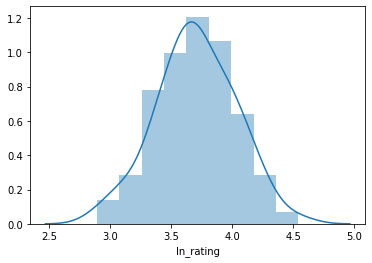

0.18253241683559907

In [70]:
data = pd.read_csv('tcereals.txt', delimiter="\t")
alpha = 0.03
data = data.sort_values(by=['rating']).reset_index(drop=True)
data['ln_rating'] = np.log(data['rating'])
N = data.shape[0]

sns.distplot(data['ln_rating'], hist=True)

plt.show()

data.head()

shapiro(data['ln_rating'])[1]

mu = np.mean(data['ln_rating'])
sigma2 = np.var(data['ln_rating'])

A2 = 0
F_i = [norm.cdf(data['ln_rating'][i], loc=mu, scale=np.sqrt(sigma2)) for i in range(N)]
F = [i / N for i in range(N + 1)]

for i in range(1, N + 1):
    A2 += (2 * i - 1) / N * (np.log(F_i[i - 1]) + np.log(1 - F_i[N - i]))
    
A2 = -A2 - N
anderson(data['ln_rating'], dist='norm')[0]


#### 6.4.4


In [71]:
alpha = 0.05
ni_X = [120, 28, 2, 0]
ni_Y = [74, 59, 15, 2]
n = sum(ni_X)
m = sum(ni_Y)
N = n + m
k = 3
r = 2

pi_X = [ni_X[i] / n for i in range(k)]
pi_Y = [ni_Y[i] / m for i in range(k)]

Pi_X = [pi_X[i] * N for i in range(k)]
Pi_Y = [pi_Y[i] * N for i in range(k)]

for i in range(k-1, -1, -1):
    if (Pi_X[i] < 5) & (Pi_Y[i] < 5) :
        Pi_X[i-1] += Pi_X[i]
        Pi_X.pop(i)
        pi_X[i-1] += pi_X[i]
        pi_X.pop(i)
        ni_X[i-1] += ni_X[i]
        ni_X.pop(i)
        Pi_Y[i-1] += Pi_Y[i]
        Pi_Y.pop(i)
        pi_Y[i-1] += pi_Y[i]
        pi_Y.pop(i)
        ni_Y[i-1] += ni_Y[i]
        ni_Y.pop(i)
    else:
        k = i + 1
        break
        
nu = [ni_X[i] + ni_Y[i] for i in range(k)]         


Stat_X = [(ni_X[i] - nu[i] * n / N) ** 2 / nu[i] / n for i in range(k)]
Stat_Y = [(ni_Y[i] - nu[i] * m / N) ** 2 / nu[i] / m for i in range(k)]
chi2_sample = N * (sum(Stat_X) + sum(Stat_Y))
chi2_alpha = chi2.ppf(1 - alpha, (k - 1) * (r - 1))

if chi2_sample < chi2_alpha:
    Hyp = '0'
else:
    Hyp = '1'

print('{:.0f}, {:.2f}, 0, {:.2f}, {}'.format((k - 1) * (r - 1), chi2_sample, chi2_alpha, Hyp))


2, 31.89, 0, 5.99, 1


## 7. Регрессионный анализ
### 7.1. Множественная линейная регрессия
#### 7.1.4

In [72]:
data = pd.read_csv('car_regr.txt', sep = '\t')
n = data.shape[0]

mean_price = np.mean(data['price'])
mean_year = np.mean(data['year'])
Num = [data['year'][i] * data['price'][i] - mean_price * mean_year for i in range(n)]
num = sum(Num)
Den = [data['year'][i] ** 2 - mean_year **2 for i in range(n)]
den = sum(Den)

beta1 = num /den

print('{:.2f}'.format(beta1))


26.04


#### 7.1.5

In [73]:
data = pd.read_csv('car_regr.txt', sep = '\t')
n = data.shape[0]

mean_price = np.mean(data['price'])
mean_year = np.mean(data['year'])
Num = [data['year'][i] * data['price'][i] - mean_price * mean_year for i in range(n)]
num = sum(Num)
Den = [data['year'][i] ** 2 - mean_year **2 for i in range(n)]
den = sum(Den)
beta1 = num /den

beta0 = mean_price - beta1 * mean_year

print('{:.2f}'.format(beta0))


-52090.27


#### 7.1.6

In [74]:
data = pd.read_csv('car_regr.txt', sep = '\t')
n = data.shape[0]

mean_price = np.mean(data['price'])
mean_year = np.mean(data['year'])
Num = [data['year'][i] * data['price'][i] - mean_price * mean_year for i in range(n)]
Den = [data['year'][i] ** 2 - mean_year **2 for i in range(n)]
num = sum(Num)
den = sum(Den)
beta1 = num /den
beta0 = mean_price - beta1 * mean_year

RSS = sum([(data['price'][i] - data['year'][i] * beta1 - beta0) ** 2 for i in range(n)])

print('{:.1f}'.format(RSS))


132015.3


#### 7.1.9

In [75]:
data = pd.read_csv('car_regr.txt', sep = '\t')
n = data.shape[0]

mean_price = np.mean(data['price'])
mean_year = np.mean(data['year'])
Num = [data['year'][i] * data['price'][i] - mean_price * mean_year for i in range(n)]
Den = [data['year'][i] ** 2 - mean_year **2 for i in range(n)]
num = sum(Num)
den = sum(Den)
beta1 = num /den
beta0 = mean_price - beta1 * mean_year

RSS = sum([(data['price'][i] - data['year'][i] * beta1 - beta0) ** 2 for i in range(n)])
S = np.sqrt(RSS / (n - 2))

print('{:.2f}'.format(S))


56.06


#### 7.1.10

In [76]:
data = pd.read_csv('car_regr.txt', sep = '\t')
n = data.shape[0]
alpha = 0.05

mean_price = np.mean(data['price'])
mean_year = np.mean(data['year'])
Num = [data['year'][i] * data['price'][i] - mean_price * mean_year for i in range(n)]
Den = [data['year'][i] ** 2 - mean_year **2 for i in range(n)]
num = sum(Num)
den = sum(Den)
beta1 = num /den
beta0 = mean_price - beta1 * mean_year

RSS = sum([(data['price'][i] - data['year'][i] * beta1 - beta0) ** 2 for i in range(n)])
S = np.sqrt(RSS / (n - 2))

t_alpha = t.ppf(1 - alpha/2, n - 2) * S * np.sqrt(1 / n / np.var(data['year']))

print('{:.1f}'.format(t_alpha))


6.4


#### 7.1.11

In [77]:
data = pd.read_csv('car_regr.txt', sep = '\t')
n = data.shape[0]
alpha = 0.05

mean_price = np.mean(data['price'])
mean_year = np.mean(data['year'])
Num = [data['year'][i] * data['price'][i] - mean_price * mean_year for i in range(n)]
Den = [data['year'][i] ** 2 - mean_year **2 for i in range(n)]
num = sum(Num)
den = sum(Den)
beta1 = num /den
beta0 = mean_price - beta1 * mean_year
P_2012 = 2012 * beta1 + beta0

print('{:.0f}'.format(P_2012))

309


#### 7.1.12


In [78]:
data = pd.read_csv('car_regr.txt', sep = '\t')
n = data.shape[0]
alpha = 0.05

mean_price = np.mean(data['price'])
mean_year = np.mean(data['year'])
Num = [data['year'][i] * data['price'][i] - mean_price * mean_year for i in range(n)]
Den = [data['year'][i] ** 2 - mean_year **2 for i in range(n)]
num = sum(Num)
den = sum(Den)
beta1 = num /den
beta0 = mean_price - beta1 * mean_year
P_2012 = 2012 * beta1 + beta0
b = (- P_2012 + 290) / np.sqrt((1 + (2012 - mean_year) ** 2 / np.var(data['year'])) / n ) / S

print('{:.3f}'.format(t.cdf(b, n - 2)))

0.045


### 7.2. Анализ остатков
#### 7.2.3

In [79]:
data = pd.read_csv('car_regr-1.txt', sep = '\t')
n = data.shape[0]

data['z'] = np.nan

for i in range(n):
    if data['auto'][i] == 'MT':
        data['z'][i] = 1
    else:
        data['z'][i] = 0

Y = data['price']
A = data[['year', 'mileage' , 'z']]
A.insert(0, '1', np.ones(n), True)

beta = np.linalg.lstsq(A, Y, rcond=None)[0]

print('{:.2f}'.format(beta[1]))


20.49


#### 7.2.4

In [80]:
data = pd.read_csv('car_regr-1.txt', sep = '\t')
n = data.shape[0]

data['z'] = np.nan

for i in range(n):
    if data['auto'][i] == 'MT':
        data['z'][i] = 1
    else:
        data['z'][i] = 0

Y = data['price']
A = data[['year', 'mileage' , 'z']]
A.insert(0, '1', np.ones(n), True)

beta = np.linalg.lstsq(A, Y, rcond=None)[0]

print('{:.2f}'.format(beta[3]))


-103.58


#### 7.2.6

In [81]:
data = pd.read_csv('car_regr-1.txt', sep = '\t')
n = data.shape[0]

data['z'] = np.nan

for i in range(n):
    if data['auto'][i] == 'MT':
        data['z'][i] = 1
    else:
        data['z'][i] = 0

A = data[['year', 'mileage' , 'z']]
A.insert(0, '1', np.ones(n), True)

Ajj = np.linalg.inv(np.array(A.T).dot(np.array(A)))

print('{:.3f}'.format(Ajj[1][1]))

0.007


#### 7.2.8

In [82]:
k = 3
alpha = 0.05

beta = np.linalg.lstsq(A, Y, rcond=None)[0]
RSS = sum((data['price'] - A.dot(beta)) ** 2)
S = np.sqrt(RSS / (n - k - 1))

t_alpha = t.ppf(1 - alpha/2, n - k - 1) * S * np.sqrt(Ajj[2][2])

print('{:.3f}'.format(t_alpha))

0.473


#### 7.2.10

In [83]:
R2 = 1 - RSS / sum([(data['price'][i] - mean_price) ** 2 for i in range(n)])

if R2 >= 0.5:
    Hyp = '1'
else:
    Hyp = '0'
    
print('{:.2f}, {}'.format(R2, Hyp))

0.75, 1


#### 7.2.13

In [84]:
print('{:.2f}'.format((data['price'][1] - A.dot(beta)[1]) / S / np.sqrt(1 - np.dot(np.dot(A, Ajj), A.T)[1][1])))


1.24


#### 7.2.15

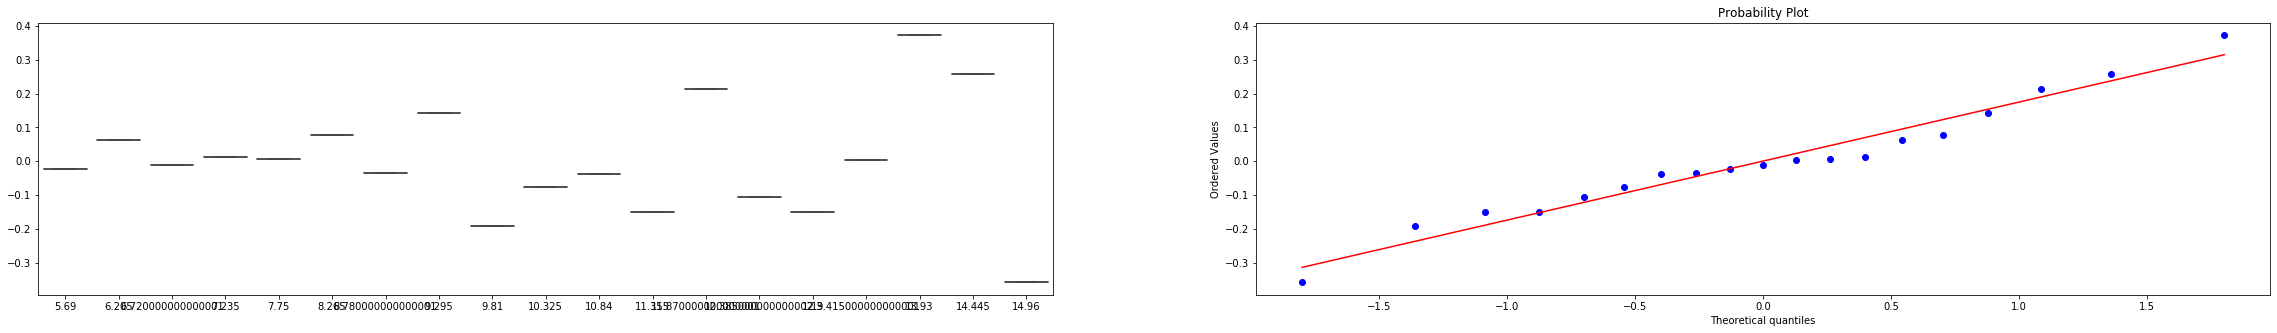

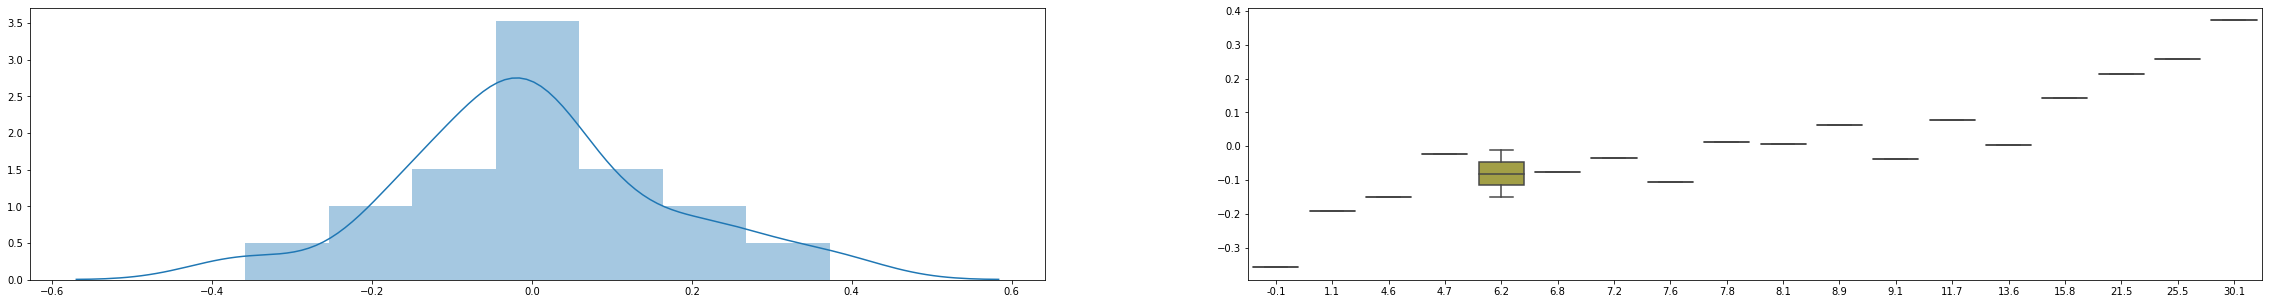

+ Зависимость дисперсии ошибок наблюдений от X
+ Зависимость дисперсии ошибок наблюдений от номера наблюдения
Наличие выборосов в данных
Зависимость дисперсии ошибок наблюдений от Y
+ Неправильная спецификация модели
Остатки ненормальны



In [85]:
X = [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]
Y = [4.7, 8.9, 6.2, 7.8, 8.1, 11.7, 7.2, 15.8, 1.1, 6.8, 9.1, 4.6, 21.5, 7.6, 6.2, 13.6, 30.1, 25.5, -0.1]
n = len(X)
beta = [4.66, 1.03]

Y_lr = beta[0] + np.array(X).dot(beta[1])
ei = Y - Y_lr

A = np.array([np.ones(n), X])
Ajj = np.linalg.inv(np.array(A).dot(np.array(A.T)))
di = [(Y[i] - Y_lr[i]) / S / np.sqrt(1 - np.dot(np.dot(A.T, Ajj), A)[i][i]) for i in range(n)]

plt.figure(figsize=(40, 5))
plt.subplot(1,2,1)
sns.boxplot(Y_lr, di)
plt.subplot(1,2,2)
probplot(di, dist="norm", plot=plt)

plt.show()

plt.figure(figsize=(40, 5))
plt.subplot(1,2,1)
sns.distplot(di, hist=True)
plt.subplot(1,2,2)
sns.boxplot(Y, di)

plt.show()

print('+ Зависимость дисперсии ошибок наблюдений от X\n'
'+ Зависимость дисперсии ошибок наблюдений от номера наблюдения\n'
'Наличие выборосов в данных\n'
'Зависимость дисперсии ошибок наблюдений от Y\n'
'+ Неправильная спецификация модели\n'
'Остатки ненормальны\n')


### 7.3. Корреляционный анализ
#### 7.3.4

In [86]:
data = [
    (3.25, 0.62), (2.51, 0.95), (1.46, 0.37), (2.37, 1.64), (2.45, 0.60),
    (-0.07, 0.19), ( 3.78, 1.81), (0.53, 0.24), (2.09, 1.26), (1.74,-0.93)
]
n = len(data)
X = [data[i][0] for i in range(n)]
Y = [data[i][1] for i in range(n)]
X_mean = np.mean(X)
Y_mean = np.mean(Y)

r = sum([(X[i] - X_mean) * (Y[i] - Y_mean) for i in range(n)]) / n / np.sqrt(np.var(X) * np.var(Y))

print('{:.2f}'.format(r))

0.56


#### 7.3.6

In [87]:
data = [
    (3.25, 0.62), (2.51, 0.95), (1.46, 0.37), (2.37, 1.64), (2.45, 0.60),
    (-0.07, 0.19), ( 3.78, 1.81), (0.53, 0.24), (2.09, 1.26), (1.74,-0.93)
]
n = len(data)
X = [data[i][0] for i in range(n)]
Y = [data[i][1] for i in range(n)]
X_mean = np.mean(X)
Y_mean = np.mean(Y)
alpha = 0.05

r = sum([(X[i] - X_mean) * (Y[i] - Y_mean) for i in range(n)]) / n / np.sqrt(np.var(X) * np.var(Y))
tstat = r * np.sqrt(n - 2) / np.sqrt(1 - r ** 2)

if (tstat >= t.ppf(alpha/2, n-2)) & (tstat <= t.ppf(1 - alpha/2, n-2)):
    Hyp = '0'
else:
    Hyp = '1'

print('{:.2f}, {}'.format(tstat, Hyp))


1.92, 0


#### 7.3.8

In [88]:
r = [7, 2, 5, 9, 8, 1, 10, 4, 6, 3]
s = [7, 4, 5, 10, 8, 2, 9, 3, 6, 1]
n = len(r)

r_s = 1 - 6 * sum([(s[i] - r[i]) ** 2 for i in range(n)]) / (n ** 3 - n)

print('{:.1f}'.format(r_s))


0.9


#### 7.3.10

In [89]:
r = [7, 2, 5, 9, 8, 1, 10, 4, 6, 3]
s = [7, 4, 5, 10, 8, 2, 9, 3, 6, 1]
n = len(r)
C = 0
D = 0


# Вариант 1

r_k = kendalltau(r, s)[0]

print('{:.1f}'.format(r_k))


# Вариант 2

for i in range(n-1):
    for j in range(i+1, n):
        if (r[i] < r[j]) and (s[i] < s[j]):
            C += 1
        if (r[i] > r[j]) and (s[i] > s[j]):
            C += 1
            
D = n * (n - 1) / 2 - C

r_k = 2 * (C - D) / n / (n - 1)

print('{:.1f}'.format(r_k))


0.8
0.8


### 7.4. Задание на построение линейной регрессии
#### 7.4.2
Постройте линейную регрессионную модель зависимости веса новорожденного от расы и образования матери, срока беременности, а также информации о курении матери во время беременности.

Формат файла:
    
    столбец 1: раса (1 – негроидная, 0 - другая)
    столбец 2: образование (от 0 до 16)
    столбец 3: курила ли (1 да, 0 нет)
    столбец 4: срок беременности (в неделях)
    столбец 5: вес новорожденного (в граммах) 

Пусть фиктивные переменные для расы и для курения принимают те же значения, что и сами переменные.

In [90]:
data = pd.read_csv('weights.txt', delimiter="\t")

n = data.shape[0]

Y = data['weight']
A = data[['race', 'educ' , 'smoke', 'preg']]
A.insert(0, '1', np.ones(n), True)

beta = np.linalg.lstsq(A, Y, rcond=None)[0]

print('{:.2f}'.format(beta[0]))

-2841.38


#### 7.4.3

In [91]:
data = pd.read_csv('weights.txt', delimiter="\t")

n = data.shape[0]

Y = data['weight']
A = data[['race', 'educ' , 'smoke', 'preg']]
A.insert(0, '1', np.ones(n), True)

beta = np.linalg.lstsq(A, Y, rcond=None)[0]


print('{:.2f}'.format(beta[1]))



-211.57


#### 7.4.4

In [92]:
data = pd.read_csv('weights.txt', delimiter="\t")

n = data.shape[0]
k = 4

Y = data['weight']
A = data[['race', 'educ' , 'smoke', 'preg']]
A.insert(0, '1', np.ones(n), True)

beta = np.linalg.lstsq(A, Y, rcond=None)[0]

Y_lr = A.dot(beta)
ei = Y - Y_lr

RSS = sum((data['weight'] - Y_lr) ** 2)
S2 = RSS / (n - k - 1)

print('{:.1f}'.format(S2))


193390.3


#### 7.4.5

In [93]:
data = pd.read_csv('weights.txt', delimiter="\t")

n = data.shape[0]
k = 4
alpha = 0.05

Y = data['weight']
A = data[['race', 'educ' , 'smoke', 'preg']]
A.insert(0, '1', np.ones(n), True)

beta = np.linalg.lstsq(A, Y, rcond=None)[0]

Y_lr = A.dot(beta)
ei = Y - Y_lr

RSS = sum( ei ** 2)
S = np.sqrt(RSS / (n - k - 1))

Ajj = np.linalg.inv(np.array(A.T).dot(np.array(A)))

t_alpha = t.ppf(1 - alpha/2, n - k - 1) * S * np.sqrt(Ajj[4][4])

print('{:.2f}'.format(t_alpha))


55.38


#### 7.4.6

In [94]:
data = pd.read_csv('weights.txt', delimiter="\t")

n = data.shape[0]
k = 4
alpha = 0.05

Y = data['weight']
A = data[['race', 'educ' , 'smoke', 'preg']]
Y_mean = np.mean(Y)
A.insert(0, '1', np.ones(n), True)

beta = np.linalg.lstsq(A, Y, rcond=None)[0]
Y_lr = A.dot(beta)
ei = Y - Y_lr
RSS = sum( ei ** 2)
R2 = 1 - RSS / sum([(Y[i] - Y_mean) ** 2 for i in range(n)])

print('{:.2f}'.format(R2))


0.34


#### 7.4.7

In [95]:
F = R2 / (1 - R2) * (n - k -1) / k

p_value = f.cdf(F, 1-alpha/2, k, n - k - 1)
print('{:.2f}'.format(p_value))

0.00


#### 7.4.8

In [96]:
p_values = [pearsonr(A[i], Y)[1] for i in A.columns]

print(['{:.2f}'.format(p_values[i]) for i in range(len(p_values))])


['nan', '0.00', '0.14', '0.48', '0.00']


#### 7.4.9

In [97]:
AIC = 2 * k + n * (np.log(RSS / n) + 1)

print('{:.1f}'.format(AIC))


1320.1


#### 7.4.10

In [98]:
data = pd.read_csv('weights.txt', delimiter="\t")

n = data.shape[0]
k = 2
alpha = 0.05

Y = data['weight']
A = data[['race', 'preg']]
A.insert(0, '1', np.ones(n), True)

beta = np.linalg.lstsq(A, Y, rcond=None)[0]

Y_lr = A.dot(beta)
ei = Y - Y_lr
RSS = sum( ei ** 2)

AIC = 2 * k + n * (np.log(RSS / n) + 1)

print('{:.1f}'.format(AIC))


1316.6


## 8. Заключительный модуль 
### 8.1. Итоговый тест
#### 8.1.2

    + Критическая область является дополнением области принятия гипотеза
    + С ростом объема выборки мощность критерия увеличивается
      С уменьшением объема выборки вероятность ошибки 1го рода увеличивается
    + С ростом объема выборки дисперсия выборочного среднего уменьшается
    + Точечная оценка является случайной величиной
      Выборочное среднее является смещенной оценкой мат.ожидания
      Уровень значимости статистического критерия равен вероятности того, что нулевая гипотеза верна
      С уменьшением уровня значимости, мощность увеличивается 

#### 8.1.3

In [99]:
X = [
    128, 107, 107, 92, 118, 114, 117, 109, 115, 106, 109, 106, 109, 120, 112, 128, 114, 119, 110, 130
]

print('{:.2f}, {:.2f}, {:.2f}'.format(np.median(X), np.mean(X), np.var(X)))


113.00, 113.50, 76.75


#### 8.1.4

In [100]:
lmbd = 2
n = 10

print('{:.1f}, {:.1f}'.format(lmbd, lmbd / n))


2.0, 0.2


#### 8.1.5

In [101]:
print('{:.3f}'.format(10 / 24))


0.417


#### 8.1.6

In [102]:
print('{:.3f}'.format(1/2))


0.500


#### 8.1.7

In [103]:
data = [
    128, 107, 107, 92, 118, 114, 117, 109, 115, 106, 109, 106, 109, 120, 112, 128, 114, 119, 110, 130
]

alpha = 0.03 
n = len(data)
s2 = np.var(data) / (n - 1) * n              # несмещенная оценка дисперсии
a = np.mean(data)        # средний стаж
a_0 = 110

Z_sample = (a - a_0) / math.sqrt(s2 / n)        #выборочная статистика
t_alpha = t.ppf(1 - alpha, n - 1)
p_value = 1 - t.cdf(Z_sample, n - 1)

if H_sample > chi2_alpha:
    Hyp = 'H0'
else:
    Hyp = 'H1'
    
print('{:.3f}, {}'.format(p_value, Hyp))

0.049, H0


#### 8.1.8

In [104]:
X = [79.2, 65.0, 72.7, 77.1, 34.8, 33.4, 54.3, 35.5, 49.2]
Y = [75, 67, 60.8, 50, 45.2, 44.6, 43.6, 40, 39.6]
n = len(X)
L = 0
alpha = 0.05
c2 = 1

m = 0

for i in range(0, n):
    a = X[i] - Y[i]
    if a < 0:
        L += 1
    if a == 0:
        m += 1
n = n - m
        
print('{:.0f}, {:.0f}, {:.0f}, {}'.format(L, 0, c2 + 1, 1))

4, 0, 2, 1


#### 8.1.9

In [105]:
means = [3.17, 2.72, 2.63, 2.29, 2.12]
disps = [0.5476, 0.5041, 0.5329, 0.49, 0.5184]
Mean = np.mean(means)
n = 200
k = 5
N = n * k
alpha = 0.05

Q1, Q2, Sum = 0, 0, 0

for j in range(k):
    Q2 += n * (means[j] - Mean) ** 2
    Q1 += disps[j] * n

sigma2_pe = Q1 / (N - k)
sigma2_H0_pe = Q2 / (k - 1)
F_sample = sigma2_H0_pe / sigma2_pe
Vk_b = f.ppf(1 - alpha, k - 1, N - k)

if F_sample > Vk_b:
    H = '0'
else:
    H = '1'

print('{:.2f}, {:.2f}, {:.2f}, {}'.format(Mean, F_sample, Vk_b, H))


2.59, 63.86, 2.38, 0


#### 8.1.10

In [106]:
d = {
    '1': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'X': [19.5, 15.0, 13.5, 23.3, 6.3, 2.5, 13.0, 1.8, 6.5, 1.8],
    'Y': [0.0, 38.5, 59.0, 97.4, 119.2, 129.5, 198.7, 248.7, 318.0, 438.5]
}

data = pd.DataFrame(data=d)
Y = data['Y']
A = data[['1', 'X']]
beta = np.linalg.lstsq(A, Y, rcond=None)[0]
n = data.shape[0]
RSS = sum((data['Y'] - A.dot(beta)) ** 2)
S = RSS / (n - 2)

print('{:.2f}, {:.2f}, {:.2f}, 1, 1'.format(beta[0], beta[1], S))


289.54, -12.09, 11423.92, 1, 1
